In [1]:
%matplotlib inline
import pandas as apd
import numpy as np
import matplotlib.pyplot as plt
from datasets import dataset_info, dataset_load

# Making Predicitons: Linear Regression 
---
Classification isn't the only task within the scope of supervised machine learning. **Regression** is another equally important task with many complemntary features. In regression, we are asked to make a real-valued prediction based upon a dataset of samples. As in classification, we can think of our dataset as an $N\times P$ matrix, with $N$ samples and $P$ features. However, for supervised tasks, instead of binary/multi-valued *labels* corresponding to partitions of the dataset, we are, often, interested in matching real-valued *response* variables. 

In the case of simple linear regression, the problems we look at are of the form
$$\mathbf{y} = \mathbf{X}\mathbf{b} + \mathbf{w},$$
where $\mathbf{y}$ are our response variables, the matrix $\mathbf{X}$ is our dataset, the vector $\mathbf{w}$ represents some noise or uncertainty on our model, and we hope to find the *explanatory* variables $\mathbf{b}$ which are able to match our observations and which generalize to future observations. Additionally, one can generalize to a wide class of so-called genearlized linear models via
$$\mathbf{b} = {\rm F}(\mathbf{X}\mathbf{b}),$$
where $F(\cdot)$ is often some stochastic function.

Here, we will consider solving regressions via **maximum a posteriori (MAP)** approaches. From the Bayesian perspective we are often attempting to solve the problem
$${\rm arg~min}\quad -\log P(\mathbf{y}|\mathbf{X},\mathbf{b}) - \log P(\mathbf{x}).$$ 
If we return to our first definition of linear regression, with additive noise that is assumed to be *iid* Gaussian, and assuming a uniform prior on the value of $\mathbf{x}$, we arrive at the common least squares (LSQ) problem,
$${\rm arg~min}_{\mathbf{b}} \quad ||\mathbf{y} - \mathbf{X}\mathbf{b} ||_2^2,$$
which we can interpret as a **maximum likelihood (MaxLike)** solution.

Regressions, and specifically linear regressions, often form the basis of the ___"Do The Simplest Thing That Could Possibly Work."___ Many times in production, simple regressions provide good-enough performance which maximize the tradeoff against engineering costs (coding time, compute time). And, as we will later see, regressions can even be applied to solve classification tasks, as in *logistic* regression. So, truly, regressions should be the first stop when encountering a new data-science or ML problem. Things can only, hopefully, go up from here !

## Simple Example
---
For example, lets think of the very simplest problem we can. How about a univariate problem,  
$$ y_i = mx_i + (w_i\sim\mathcal{N}(0,\Delta)),$$
where the value of $x$ are our known data points, we observe some response variables $y$, and wish to estimate the scalar value of $m$ which relates the two. To keep this problem from being entirely trivial, we introduce some noise with variance $\Delta$.

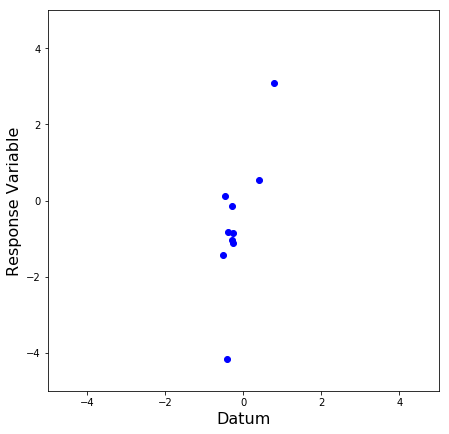

In [2]:
##--- Problem Parameters ---##
m = 2            # Model parmaeter to be learned
n = 10          # Number of samples to train with
delta = 1e0     # Observational noise variance

##--- Generate Data ---##
x = 2*np.random.rand(n) - 1
w = np.sqrt(delta)*np.random.randn(n)
y = m*x + w

##--- Visualize ---##
plt.figure(figsize=(7,7))
plt.plot(x,y,'ob')
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response Variable", fontsize = 16)
plt.axis([-5, 5, -5, 5]);

So how can we estimate the response variable $m$ ? In this case it should be quite easy to find the right value of $m$, especially when we have a lot of data and the value of $\Delta$ is not too high. Lets make a calculation on paper of what this value should be in a Bayesian sense. First we write the likelihood,
$$ P(\mathbf{y} | \mathbf{X}, \mathbf{b}) = \frac{1}{\sqrt{2\pi \Delta}} \exp\left[-\frac{(\mathbf{y} - m\mathbf{x})^2}{2\Delta}\right].$$
Now, for MAP estimation we want to look at the negative log value and we can drop any constant terms...

$$-\log P(\mathbf{y}| \mathbf{X}, \mathbf{b}) \propto (\mathbf{y} - m\mathbf{x})^2 $$
$$-\log P(\mathbf{y}| \mathbf{X}, \mathbf{b}) \propto \mathbf{y}^T\mathbf{y} + m^2\mathbf{x}^T\mathbf{x} - 2m\mathbf{y}^T\mathbf{x}$$

Now we have the problem
$${\rm arg~min}_m \quad -\log P(\mathbf{y}|\mathbf{X}, \mathbf{b})$$
$${\rm arg~min}_m \quad \mathbf{y}^T\mathbf{y} + m^2\mathbf{x}^T\mathbf{x} -
2m\mathbf{y}^T\mathbf{x}$$
$${\rm arg~min}_m \quad m^2\mathbf{x}^T\mathbf{x} - 2m\mathbf{y}^T\mathbf{x}$$

Since this is a convex problem over $m$, taking the minimizer is as simple as finding the root of the derivative, hence,
$$m^* = {\rm arg~min}_m \quad m^2\mathbf{x}^T\mathbf{x} - 2m\mathbf{y}^T\mathbf{x} = \frac{\mathbf{y}^T\mathbf{x}}{\mathbf{x^T}\mathbf{x}}$$

---
### Mini-Task: Calculate the MAP $m^*$

In [3]:
##--- Task 1 ---#
# Calculate the MAP estimate of `m` given the dataset `x` given observed `y`.
m_estimate = 
print("m* (MaxLike): ", m_estimate)

SyntaxError: invalid syntax (<ipython-input-3-b3c5117eb001>, line 3)

In [4]:
# %load task1.py
m_estimate = np.dot(y,x) / np.dot(x,x)
print(m_estimate)

3.30490171984


---
### Mini-Task: Brute-Force Search

*Step 1: Define Likelihood (TASK)*

In [5]:
def likelihood(x, y, m, d):
    """
        Define the likelihood for a given set of data and expanatory variable $m$,
            y = mx + noise (iid Gaussian with variance d)
    """
    p = 
    return p


SyntaxError: invalid syntax (<ipython-input-5-160d35b14656>, line 6)

In [6]:
# %load task2-1.py
def likelihood(x, y, m, d):
    """
        Define the likelihood for a given set of data and expanatory variable $m$,
            y = mx + noise (iid Gaussian)
    """
    r = y - m*x
    p = 1 / np.sqrt(2*np.pi*d) * np.exp(-1 / (2*d) * np.dot(r,r))
    return p



*Step 2: Find all values*

In [7]:
##--- Initialize Parameters ---##
m_test_vals = np.linspace(-5,5,1000)
like_over_m = np.zeros(len(m_test_vals))

##--- Loop over Values ---##
for (i,m_test) in enumerate(m_test_vals):
    like_over_m[i] = likelihood(x,y,m_test,delta)

*Step 3: Plot*

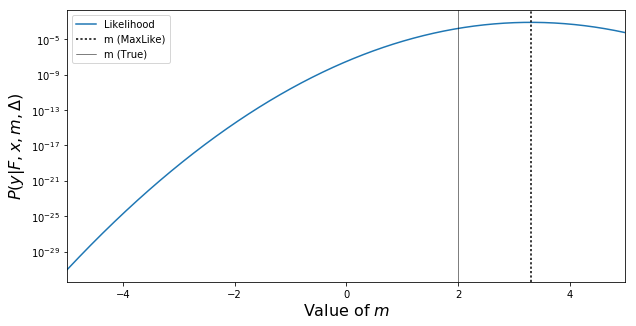

In [8]:
##--- Plot Context ---##
plt.figure(figsize=(10,5))

##--- Plot Command ---##
plt.plot(m_test_vals,like_over_m, label = "Likelihood")

##--- Plot Formatting ---##
plt.xlim([-5, 5])
plt.yscale("log")
plt.xlabel("Value of $m$",fontsize = 16)
plt.ylabel("$P(y|F,x,m,\Delta)$", fontsize = 16)
plt.axvline(m_estimate, color = "k", linestyle = ":", label = "m (MaxLike)")
plt.axvline(m, color = "k", linestyle = "-", label = "m (True)", linewidth = 0.5)
plt.legend(loc=2)

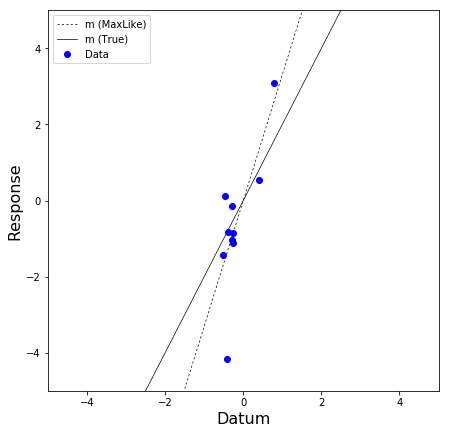

In [9]:
##--- Plot Context ---##
plt.figure(figsize=(7,7))

##--- Plot Command ---##
plt.plot(np.linspace(-5,5,100),m_estimate*np.linspace(-5,5,100),":k", linewidth=0.7, label = "m (MaxLike)")
plt.plot(np.linspace(-5,5,100),m*np.linspace(-5,5,100),"-k", linewidth=0.7, label = "m (True)")
plt.plot(x,y, "ob", label = "Data")

##--- Plot Formatting ---##
plt.axis([-5, 5, -5, 5])
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response", fontsize = 16)
plt.legend(loc=2)

---

So we can see that even for this simple test, when the number of samples is low, we can mismatch the correct value of the slope, even for a quite easy problem like this. 

## Multiple Features
---
Lets take a look at some models with more than one feature. How can we solve these problems? In the context of linear regression, our features might be linear or non-linear, however the problem remains linear in terms of the predictors. For example, one could attempt to fit a polynomial model, 
$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_P x^P,$$
using a linear regression, e.g.
$$ \mathbf{y} = [\mathbf{1}, \mathbf{x}, \mathbf{x}^2, \cdots, \mathbf{x}^P] \times \boldsymbol{\beta} = \mathbf{X}\boldsymbol{\beta}.$$

A simple least squares can be used to fit such a model. Lets take a look at an example where the underlying model is an order-2 polynomial (quadratic).

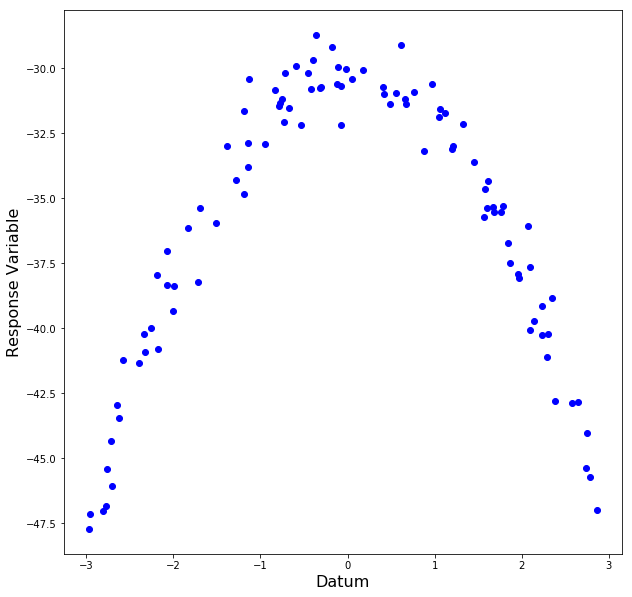

In [10]:
##--- Problem Parameters ---##
a = 0.1         # Order-1 Coefficient
b = -2           # Order-2 Coefficient
C = -30         # Offset
n = 100         # Number of samples to train with
delta = 1e0     # Observational noise variance

##--- Generate Data ---##
x = 6*np.random.rand(n) - 3
w = np.sqrt(delta)*np.random.randn(n)
y = a*x + b*np.power(x,2) + C + w

##--- Visualize ---##
plt.figure(figsize=(10,10))
plt.plot(x,y,'ob')
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response Variable", fontsize = 16)
# plt.axis([-5, 5, -5, 5]);

Now, to solve this problem, we need to build the matrix of features. Since we are interested in polynomial fitting, lets write a function which builds the feature matrix for us.

In [11]:
#TODO: Make task
def power_features(x, maxPower):
    """
        Given a vector of data points, x, build a matrix of power
        features from 0 (constant) up to power p for use with
        polynomial fitting.
    """
    X = np.zeros((x.shape[0], maxPower+1))
    
    for p in range(0,maxPower+1):
        X[:,p] = np.power(x,p)    
    
    return X

Now, lets make a fit. So, how do we solve for all of the coefficients at once? We can follow through the same as in the simple slope regression example and arrive at the solution for the MaxLike estimate. Another way of looking at this is to see the problem through the lens of linear algebra, we want to find an estimate which minimizes the _residual sum of squares_,

$$\hat{\boldsymbol{\beta}} = {\rm arg~min}_{\boldsymbol{\beta}}\quad{\rm RSS}(\boldsymbol{\beta}) \\
\hat{\boldsymbol{\beta}} = {\rm arg~min}_{\boldsymbol{\beta}}\quad ||\mathbf{y} - \mathbf{X}\boldsymbol{\beta}||_2^2 $$

Finding the minimum of this convex cost is simply finding the zero of the gradient, as before,
$$ \frac{\partial{\rm RSS}}{\partial\boldsymbol{\beta}} =
-2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}),$$

$$\therefore\quad
   \hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}
   \mathbf{X}^T\mathbf{y},
$$
which gives us the classical LSQ solution (as presented in lecture). 

Now, let us take a look at fitting higher dimensional models to our dataset above. First, we just need to create the different feature sets for the different models.

In [12]:
#--- Create Different Models ---#
XQuad = power_features(x,2)
XCube = power_features(x,3)
XSilly = power_features(x,10)

In [13]:
#--- LSQ long-way using linalg.solve ---#
# We can use np.linalg.solve for solving square systems...
fitQuad = np.linalg.solve(np.dot(XQuad.T,XQuad),np.dot(XQuad.T,y))
fitCube = np.linalg.solve(np.dot(XCube.T,XCube),np.dot(XCube.T,y))
fitSilly = np.linalg.solve(np.dot(XSilly.T,XSilly),np.dot(XSilly.T,y))

#--- LSQ directly using linalg.lstsq ---#
# We can also use the explicit least squares function which does some
# of this leg-work for us. Also returns a number of other items, see
# documentation for all of it. (Fit parameters are given in the first
# location of the returned tuple, hence the suffic `[0]`).
fitQuad = np.linalg.lstsq(XQuad,y)[0]
fitCube = np.linalg.lstsq(XCube,y)[0]
fitSilly = np.linalg.lstsq(XSilly,y)[0]

#--- Show fit params ---#
print("Fit Quad. Model: ", fitQuad)
print("Fit Cube. Model: ", fitCube)
print("Fit Silly Model: ", fitSilly)

Fit Quad. Model:  [-30.09525633   0.07329646  -1.96559976]
Fit Cube. Model:  [ -3.00877060e+01   1.59254766e-01  -1.97022409e+00  -1.63197385e-02]
Fit Silly Model:  [ -3.04281740e+01  -5.89788442e-01  -6.51096829e-01   1.27179767e+00
  -1.12861467e+00  -5.49127872e-01   3.48061985e-01   8.54972942e-02
  -4.32114247e-02  -4.43556921e-03   1.83911277e-03]


And, visualizing what these different models are on our dataset, we see the following.

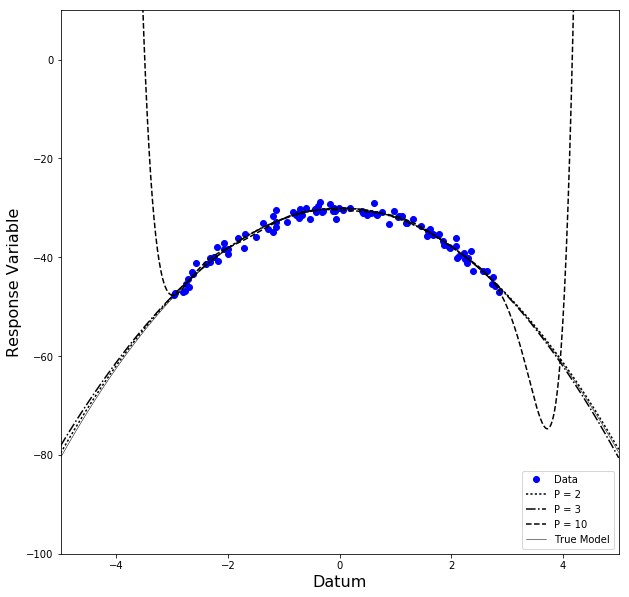

In [14]:
#--- Create fit curve domain ---#
xdom = np.linspace(-5,5,1000)
Xdom = power_features(xdom,10)

#--- Predictions of different models ---#
yQuad = np.dot(Xdom[:,0:3], fitQuad)
yCube = np.dot(Xdom[:,0:4], fitCube)
ySilly = np.dot(Xdom, fitSilly)

#--- Visualize ---#
plt.figure(figsize=(10,10))

plt.plot(x,y,'ob',label = 'Data')
plt.plot(xdom, yQuad,':k', label = 'P = 2')
plt.plot(xdom, yCube,'-.k', label = 'P = 3')
plt.plot(xdom, ySilly,'--k', label = 'P = 10')
plt.plot(xdom,a*xdom + b*np.power(xdom,2) + C,'-k', linewidth = 0.5, label = 'True Model')
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response Variable", fontsize = 16)
plt.axis([-5,5,-100,10])
plt.legend(loc=4)

So, we can see that within the range of the data points, with enough presented data, all of the models do well to fit the data. However, outside of those bounds, the error can be much larger. This is the problem of fitting versus generalization. In our case, the error agains the datapoints might be good for higher degree models...

In [15]:
trainingRSSQuad = np.sum(np.power(y - np.dot(XQuad,fitQuad),2))
trainingRSSCube = np.sum(np.power(y - np.dot(XCube,fitCube),2))
trainingRSSSilly = np.sum(np.power(y - np.dot(XSilly,fitSilly),2))

print("Trained RSS (Quad): ", trainingRSSQuad)
print("Trained RSS (Cube): ", trainingRSSCube)
print("Trained RSS (Silly): ", trainingRSSSilly)

Trained RSS (Quad):  94.373949526
Trained RSS (Cube):  93.9906075677
Trained RSS (Silly):  86.5092755318


So, we can see that the crazy-high degree model does better at matching our training data ! But we can visually see that this model is far too powerful for the amount of data we have. It is able to fit the data while doing the wrong thing in general, as we can see...

In [16]:
ytest = np.dot(Xdom[:,0:3],[C,a,b])
testRSSQuad = np.sum(np.power(ytest - np.dot(Xdom[:,0:3],fitQuad),2))
testRSSCube = np.sum(np.power(ytest - np.dot(Xdom[:,0:4],fitCube),2))
testRSSSilly = np.sum(np.power(ytest - np.dot(Xdom,fitSilly),2))

print("Trained RSS (Quad): %0.5g" %testRSSQuad)
print("Trained RSS (Cube): %0.5g" %testRSSCube)
print("Trained RSS (Silly): %0.5g" % testRSSSilly)

Trained RSS (Quad): 108.82
Trained RSS (Cube): 460.01
Trained RSS (Silly): 1.8337e+09


So, a huge error when tested over a larger range of possible values ! This shows that we, in some way, need to make sure that we use the simplest model possible that generalizes. However, in practice, we often don't know how simple or complex the underlying data is. There are a couple of approaches here. One is to simply acquire more data, and make sure that you acquire data over the whole range of possible values. But, scaling up data acquisition might not be feasible for some applications. How can we tune the parameters that we use ? Lets take a look at **regularization**. 

## Regularization
---
In the examples we've looked at, we had a simple univariate problem and we were interested in making regressions according to functions (polynomials) of that cure datum. In this case, we have some discretion in choosing how complicated of a model to pick. And we have a natural way to scale the generalization capability of the model.

However, in practice we might not have such a convenience. Often in regression tasks we have some response variable, perhaps a patient diagnosis or an experimental result, and we have many, many features which were measured in parallel with that observation. We would like to estabilish some model of the result given some combination of these measured features. 

In this case, *a priori*, we have no idea which possible features we measure will be the best predictors. Our idea is simply to acquire as much data as we can and write an algorithm to untagle the correlations in the dataset. In this case, we need to have some method of *selecting* the best possible features. Additionally, we are often taking measurements of different features which might be highly correlated, thus reducing the overall predictiveness of our regression model (with respect to the number of measured features).

Regularization offers us a possiblity of accounting for some of these obstacles. We want to admit as complicated of a model as possible (to drive down fitting error), but we want some degree of regularization in order to also promote the *simplest* model as possible. Lets take a look at a few approaches.

### Ridge Regression
In ridge regression (RR), we want to fit our response variables, but we want the model parameters $\beta$ to have a small variance. We can accomplish this via an $\ell_2$ penalty on the paramters,
$$ \hat{\boldsymbol{\beta}} = {\rm arg~min}_{\boldsymbol{\beta}}\quad
    ||\mathbf{y}-\mathbf{X}\boldsymbol{\beta}||_2^2 + \lambda || \boldsymbol{\beta}||_2^2,$$
In this regression, the regularization term $\lambda$ serves as a tuning term which balances between the model fit and the variance of the model parameters. Because this regularization penalizes "long" parameter vectors via the $\ell_2$ norm, this kind of regression is often referred to as a **shrinkage**. 

There is a direct analytical solution to this regression, as in the case of least squares. We just need to solve
$$ \hat{\boldsymbol{\beta}} = 
    (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}.
$$

As a test case, lets take a look at a random problem which exhibits correlated features.

<Container object of 3 artists>

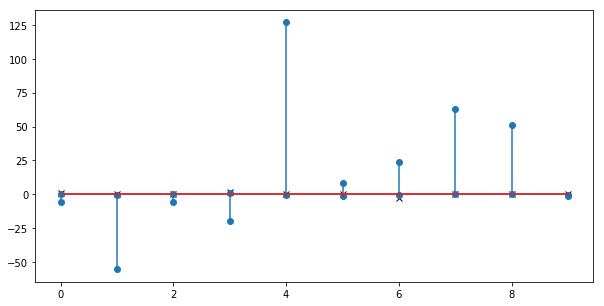

In [17]:
#--- Experiment Parameters ---#
n = 1000           # Number of Samples
p = 10             # Number of Parameters
delta = 0.1       # Model error variance
lam = 0.1          # Regularization level
r = 4              # Rank of dataset

#--- Create Low-Rank Data ---#
# Create two matrices (NxR) and (RxP).
A = np.random.randn(n,r)/np.sqrt(r)
B = np.random.randn(r,p)/np.sqrt(p) 
# Create low-rank dataset
X = np.dot(A,B)
# Create ground-truth model parameters
betaModel = np.zeros(p)
betaModel[3] = 2
betaModel[6] = -3
betaModel[0] = 1
# Form observations
y = np.dot(X, betaModel) + np.sqrt(delta)*np.random.randn(n)


#--- OLS Solution ---#
betaOLS = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

#--- Ridge Regression Solution ---#
R = np.diag(np.full(p,lam))
betaRR = np.linalg.solve(np.dot(X.T,X) + R,np.dot(X.T,y))

#--- Visualization ---#
plt.figure(figsize=(10,5))
plt.plot(betaModel,'kx')
plt.stem(betaOLS)
plt.stem(betaRR,'r')

# #--- Solve the RR fit ---#
# P = XSilly.shape[1]
# R = np.diag(np.full(P,lam))
# fitSillyRR = np.linalg.solve(np.dot(XSilly.T,XSilly) + R,np.dot(XSilly.T,y))

# #--- Predictions of different models ---#
# ySillyRR = np.dot(Xdom, fitSillyRR)

# #--- Visualize ---#
# plt.figure(figsize=(10,10))

# plt.plot(x,y,'ob',label = 'Data')
# plt.plot(xdom, ySilly,'--k', label = 'P = 10, $\lambda$ = 0')
# plt.plot(xdom, ySillyRR,':k', label = 'P = 10, $\lambda$ = %0.2f' % lam)
# plt.plot(xdom,a*xdom + b*np.power(xdom,2) + C,'-k', linewidth = 0.5, label = 'True Model')
# plt.xlabel("Datum",fontsize = 16)
# plt.ylabel("Response Variable", fontsize = 16)
# plt.axis([-5,5,-100,10])
# plt.legend(loc=4)

In [18]:
ldom = np.logspace(-8,8,100)

rss = np.zeros(len(ldom))
reg = np.zeros(len(ldom))

for (i,l) in enumerate(ldom):
    R = np.diag(np.full(P,l))
    fit = np.linalg.solve(np.dot(XSilly.T,XSilly) + R,np.dot(XSilly.T,y))
    rss[i] = np.sum(np.power(y - np.dot(XSilly,fit),2))
    reg[i] = np.sum(np.power(fit,2))
    
plt.figure(figsize=(7,7))    
plt.loglog(rss,reg)

NameError: name 'P' is not defined

In [19]:
ldom = np.logspace(-8,8,500)
rssTest = np.zeros(len(ldom))

for (i,l) in enumerate(ldom):
    R = np.diag(np.full(P,l))
    fit = np.linalg.solve(np.dot(XSilly.T,XSilly) + R,np.dot(XSilly.T,y))
    rssTest[i] = np.sum(np.power(ytest - np.dot(Xdom,fit),2))
    
plt.figure(figsize=(10,7))    
plt.loglog(ldom,rssTest)

NameError: name 'P' is not defined